### Gerekli Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##### **Veri Ön İşleme :** numpy, pandas
##### **Veri Görselleştirme :** seaborn, matplotlib 
##### **GridSearchCv :** Hiperparametre Optimizasyonu için kullanılır.
##### **LocalOutlierFactor :** Aykırı değerleri tespit etmek için kullanılır.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Veri Setinin Yüklenmesi

In [3]:
df = pd.read_csv("Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Veriyi Anlama

### Veri Seti Hakkında Bilgi

| DEĞİŞKENLER     | AÇIKLAMA            | ALT SINIF                  |
|-----------------|---------------------|----------------------------|
| CustomerId      | Müşteri İd          | id                         |
| CreditScore     | Kredi Skoru         | 350 - 850                  |
| Geography       | Coğrafya            | İspanya - Almanya - Fransa |
| Gender          | Cinsiyet            | Kadın – Erkek              |
| Age             | Yaş                 | 18 - 92                    |
| Tenure          | Müşteri olma süresi | 0 - 10                     |
| Balance         | Bakiye              | 0 - 250.898                |
| NumOfProducts   | Ürün Sayısı         | 1- 2 - 3 - 4               |
| HasCrCard       | Kredi kartı var mı? | 0 - 1                      |
| IsActiveMember  | Aktif üye mi?       | 0 - 1                      |
| EstimatedSalary | Maaş Tahmini        | 11 - 199.992               |
| Exited          | Churn durumu        | 0 (remain) – 1 (churn)     |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Betimsel İstatistiklerin Hesaplanması

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Eksik Değer Analizi

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Korelasyon Analizi

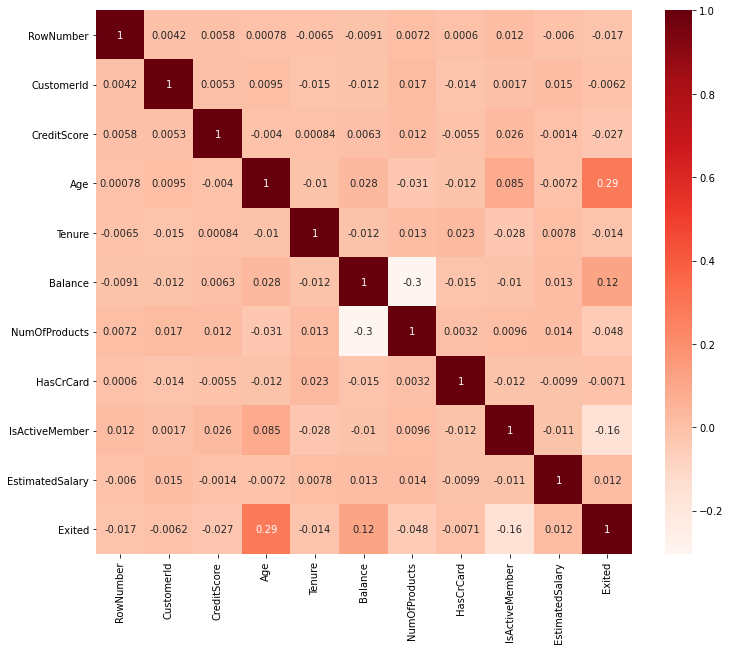

In [7]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Bağımlı Değişkeni İnceleme

In [8]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

0.2037


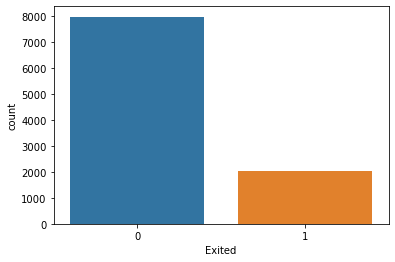

In [9]:
print(2037/10000)
sns.countplot(df['Exited'],label="Count");

Veri setinde 0-1 dengesi: %80-20

## Bağımsız Değişkenleri İnceleme

### CreditScore (Kredi Skoru)

In [10]:
df["CreditScore"].describe().T

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

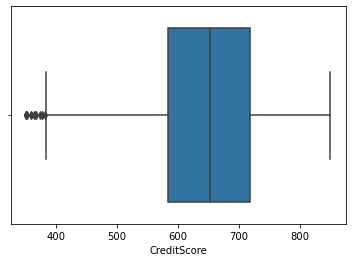

In [11]:
sns.boxplot(df["CreditScore"]);

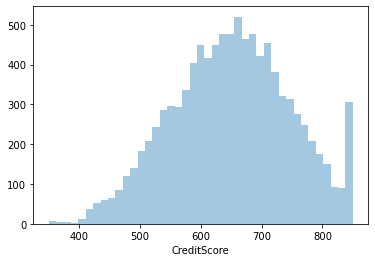

In [12]:
sns.distplot(df["CreditScore"], kde=False);

### Age (Yaş)

In [13]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

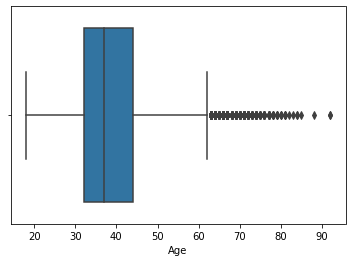

In [14]:
sns.boxplot(df["Age"]);

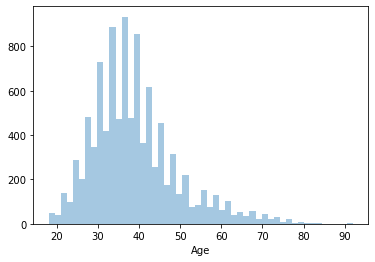

In [15]:
sns.distplot(df["Age"], kde=False);

### Tenure (müşteri olma süresi)

In [16]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

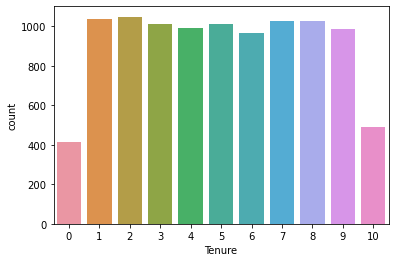

In [17]:
sns.countplot(df['Tenure'],label="Count");

### Balance (Bakiye)

In [18]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

### NumOfProducts (Ürün Sayısı)

In [19]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

### HasCrCard (Kredi kartı var mı?)

In [20]:
print(df["HasCrCard"].value_counts())

1    7055
0    2945
Name: HasCrCard, dtype: int64


0-1 proportion: 0.7055


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

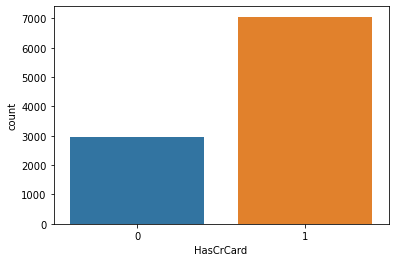

In [21]:
print("0-1 proportion:",7055/10000)
sns.countplot(df['HasCrCard'],label="Count")

## Veri Ön İşleme

### Gereksiz Kolonların Silinmesi

In [22]:
df = df.drop(["RowNumber","Surname","CustomerId"],axis = 1)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Aykırı Değer Analizi

In [24]:
df_a = df.select_dtypes(include = ["float64","int64"])
df_a.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [25]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [26]:
clf.fit_predict(df_a)

array([ 1,  1, -1, ..., -1,  1,  1])

In [27]:
df_scores = clf.negative_outlier_factor_

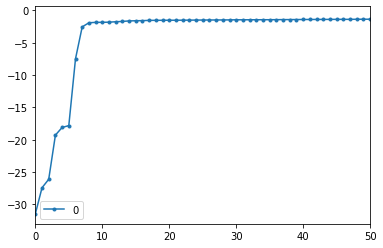

In [28]:
plot_xlim = 50
pd.DataFrame(np.sort(df_scores)).plot(stacked = True, xlim= [0,plot_xlim], style = ".-");

#### Eşik değerin tespiti için grafik oluşturuldu.

In [29]:
print(np.sort(df_scores)[0:plot_xlim])

[-31.49663685 -27.44927654 -26.14262253 -19.30696453 -18.13171409
 -17.84140487  -7.5107614   -2.57672799  -1.94375423  -1.87606468
  -1.8695207   -1.84846824  -1.78318189  -1.73424049  -1.6544467
  -1.62935918  -1.6104212   -1.5696074   -1.56190544  -1.55336258
  -1.54929217  -1.54715089  -1.53882179  -1.53491898  -1.52313988
  -1.51682373  -1.51195229  -1.50903939  -1.50179381  -1.49541553
  -1.48059874  -1.48050377  -1.4764176   -1.47550725  -1.46917115
  -1.46826836  -1.46094353  -1.45205995  -1.44833385  -1.44133983
  -1.4338032   -1.42862437  -1.42502668  -1.42168784  -1.41543383
  -1.41207162  -1.40982989  -1.40921302  -1.39902307  -1.39180439]


In [30]:
np.sort(df_scores)[6]

-7.510761395609971

In [31]:
esik_deger = np.sort(df_scores)[6]

In [32]:
df = df.drop(df[df_scores < esik_deger].index,axis = 0 ).reset_index(drop = True)

#### Eşik değer belirlenerek eşik değerden küçük değerler(aykırı değerler) silindi.

### Kategorik Verilerin Sayısal Veriye Çevrilmesi

In [33]:
df_cat = pd.get_dummies(df[["Geography","Gender"]])

In [34]:
df_cat.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [35]:
df = df.drop(["Geography","Gender"],axis=1)

In [36]:
df = pd.concat([df, df_cat],axis=1)

In [37]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9994 non-null   int64  
 1   Age                9994 non-null   int64  
 2   Tenure             9994 non-null   int64  
 3   Balance            9994 non-null   float64
 4   NumOfProducts      9994 non-null   int64  
 5   HasCrCard          9994 non-null   int64  
 6   IsActiveMember     9994 non-null   int64  
 7   EstimatedSalary    9994 non-null   float64
 8   Exited             9994 non-null   int64  
 9   Geography_France   9994 non-null   uint8  
 10  Geography_Germany  9994 non-null   uint8  
 11  Geography_Spain    9994 non-null   uint8  
 12  Gender_Female      9994 non-null   uint8  
 13  Gender_Male        9994 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 751.6 KB


#### Veri setinin bilgileri incelendi ve bütün veri tiplerinin sayısal olduğu görüldü.


## Model

In [39]:
X = df.drop(["Exited"],axis=1)

In [40]:
y = df["Exited"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state=42)

#### Veri seti eğitim seti ve test seti olarak ikiye ayrıldı.

In [42]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
loj_model = LogisticRegression().fit(X_train,y_train)
svm_model = SVC().fit(X_train,y_train)
cart_model = DecisionTreeClassifier().fit(X_train,y_train)
rf_model = RandomForestClassifier().fit(X_train,y_train)
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
catb_model = CatBoostClassifier().fit(X_train,y_train,verbose=False)
lgbm_model = LGBMClassifier().fit(X_train,y_train)
xgb_model = XGBClassifier().fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
Modeller = [
    knn_model,
    loj_model,
    svm_model,
    cart_model,
    rf_model,
    gbm_model,
    catb_model,
    lgbm_model,
    xgb_model
]
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller","Accuracy"])

for model in Modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

#### Her modelin doğruluk oranı hesaplandı.

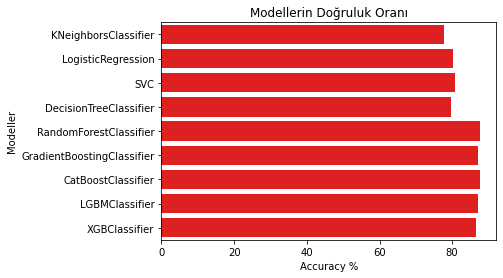

In [44]:
sns.barplot(x ='Accuracy', y ='Modeller',data=sonuclar,color="r" )
plt.xlabel('Accuracy %') 
plt.title('Modellerin Doğruluk Oranı');

In [45]:
sonuclar[:]

,Modeller,Accuracy
0,KNeighborsClassifier,77.792598
0,LogisticRegression,80.193398
0,SVC,80.826942
0,DecisionTreeClassifier,79.726576
0,RandomForestClassifier,87.529176
0,GradientBoostingClassifier,87.195732
0,CatBoostClassifier,87.729243
0,LGBMClassifier,87.129043
0,XGBClassifier,86.628876


#### Modellerin doğruluk oranları grafiklendirilerek en yüksek doğruluk oranına sahip olan model seçildi.
#### **CatBoost**: 87.729 değeri ile en yüksek doğruluk oranına sahiptir.

## Model Tuning

#### Model tahmin performansını arttırmak için hiperparametre optimizasyonu yapılmasıdır.

In [46]:
catb = CatBoostClassifier()

In [47]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.03,0.1],
              "depth":[4,5,6,8]}

In [48]:
catb_cv_model = GridSearchCV(catb,catb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0:	learn: 0.6703402	total: 3.13ms	remaining: 1.56s
1:	learn: 0.6492412	total: 6.21ms	remaining: 1.55s
2:	learn: 0.6303385	total: 9.37ms	remaining: 1.55s
3:	learn: 0.6124623	total: 12.6ms	remaining: 1.56s
4:	learn: 0.5991323	total: 15.8ms	remaining: 1.56s
5:	learn: 0.5847982	total: 18.9ms	remaining: 1.55s
6:	learn: 0.5719726	total: 22.3ms	remaining: 1.57s
7:	learn: 0.5580569	total: 25.9ms	remaining: 1.59s
8:	learn: 0.5469431	total: 29.4ms	remaining: 1.6s
9:	learn: 0.5343227	total: 32.6ms	remaining: 1.6s
10:	learn: 0.5233892	total: 35.8ms	remaining: 1.59s
11:	learn: 0.5153886	total: 39ms	remaining: 1.59s
12:	learn: 0.5069256	total: 42.2ms	remaining: 1.58s
13:	learn: 0.4995662	total: 45.4ms	remaining: 1.57s
14:	learn: 0.4905758	total: 48.6ms	remaining: 1.57s
15:	learn: 0.4830382	total: 51.8ms	remaining: 1.57s
16:	learn: 0.4766539	total: 55.1ms	remaining: 1.56s
17:	learn: 0.4697096	total: 58.4ms	remaining: 1.56s
18:	learn: 0.46

In [49]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 500, 'learning_rate': 0.03}

In [50]:
catb_tuned = CatBoostClassifier(iterations=500,learning_rate=0.03,depth=4).fit(X_train,y_train,verbose=False)

In [51]:
y_pred = catb_tuned.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.8739579859953318

#### CatBoost modeli için **GridSearchCV** yöntemiyle hiperparametre optimizasyonu yapıldı fakat daha yüksek bir doğruluk oranına ulaşılamadı.

## Değişken Önem Düzeyleri

#### Veri setindeki değişkenlerin CatBoost Modeli ile yapılan doğruluk hesaplamasındaki önem düzeyleri belirlendi.

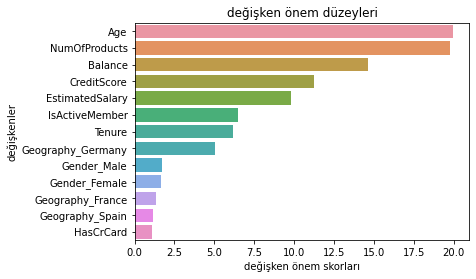

In [53]:
feature_imp = pd.Series(catb_model.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")
plt.show()